Taller análisis numérico

Integrantes:
    - Felipe Villa Jaramillo
    - Juan Pablo Cardona Bedoya



In [2]:
"""
Funciones que calculan métodos numéricos
"""

import sympy as sp


def Biseccion(funcion,a,b,tolerancia):
    
    if funcion(a) * funcion(b) > 0:
        print('La función no cumple el teorema en el intervalo inicial')
        return
    else:
        iteracion = 0
        while (abs(b-a) > tolerancia):
            iteracion+=1
            p = (a+b)/2
            if (funcion(a)*funcion(p)) > 0:
                a = p
            else:
                b = p
        return iteracion,p

def falsa_posicion(funcion,a,b,tolerancia):
    
    if funcion(a) * funcion(b) > 0:
        print('La función no cumple el teorema en el intervalo inicial')
        return
    else:
        iteracion = 0
        p = b-funcion(b)*(a-b)/(funcion(a)-funcion(b))
        while (abs(funcion(p))>tolerancia):
            iteracion+=1
            p = b-funcion(b)*(a-b)/(funcion(a)-funcion(b))
            if (funcion(a)*funcion(p)) > 0:
                a = p
            else:
                b = p
        return iteracion,p

def newton_rapshon(funcion,x0,tolerancia,x):
    derivada_funcion = sp.diff(funcion,x)
    x1 : float = x0 - (funcion.evalf(subs={x:x0})/derivada_funcion.evalf(subs={x: x0}))
    iteraciones = 0
    while abs(x1 - x0) > tolerancia:
        iteraciones += 1
        x0 = x1
        x1 = x0 - (funcion.evalf(subs={x: x0}) / derivada_funcion.evalf(subs={x: x0}))
    return iteraciones, x1


def secante(funcion, x0, x1, tolerancia):
    iteraciones = 0
    error = 1
    while (error > tolerancia):
        iteraciones += 1
        x2 = x1 - (funcion(x1) * (x0-x1))/(funcion(x0) - funcion(x1))
        error = abs(x2 - x1)
        x0 = x1
        x1 = x2
    
    return iteraciones, x2





En el análisis de sistemas de control, se desarrollan funciones de transferencia que relacionan en
forma matemática la dinámica de la entrada de un sistema con su salida. La función de transferencia
para un sistema de posicionamiento robotizado está dada por:

G(s) = $\frac{C(s)}{N(s)}$ = $
\frac{s^3 + 12.5s^2 + 50.5s + 66}{s^4 + 19s^3 + 122s^2 + 296s + 192}
$

donde G(s) = ganancia del sistema, C(s) = salida del sistema, N (s) = entrada del sistema y s =
frecuencia compleja de la transformada de Laplace. Utilice una técnica numérica para obtener las
raı́ces del numerador y el denominador, y factorı́celas en la forma siguiente:

G(s) = $\frac{((s + a_1)(s + a_2)(s + a_3))}{((s + b_1)(s + b_2)(s + b_3)(s + b_4))}$

donde ai , bi son las raices respectivamente del numerados y denominador
a) Encuentre dos frecuencias con Método de Bisección
b) Encuentre dos frecuencias Método de Falsa posición
c) Encuentre dos frecuencias Método de Newton
d) Encuentre una frecuencia con método de la Secante
Compare el número de iteraciones obtenidas con casa uno de los métodos

A continuación están las gráficas de donde se tomaron los valores para calcular cada uno de las raíces que tenemos en el ejercicio tanto de G(s) como de N(s)

![Gráfica 1](https://i.imgur.com/dhlcCn8.png "Gráfica de la función G(s)")
![Gráfica 2](https://i.imgur.com/wNfxbkP.png "Gráfica de la función N(s)")



In [3]:
"""
En el análisis de sistemas de control, se desarrollan funciones de transferencia que relacionan en
forma matemática la dinámica de la entrada de un sistema con su salida. La función de transferencia
para un sistema de posicionamiento robotizado está dada por:

G(s) = C(s)/N(s) = (s³ + 12.5s² + 50.5s +66) / (s⁴ + 19s³ + 122s² + 296s + 192)

donde G(s) = ganancia del sistema, C(s) = salida del sistema, N (s) = entrada del sistema y s =
frecuencia compleja de la transformada de Laplace. Utilice una técnica numérica para obtener las
raı́ces del numerador y el denominador, y factorı́celas en la forma siguiente:

G(s) = ((s + a_1)(s + a_2)(s + a_3)) / ((s + b_1)(s + b_2)(s + b_3)(s + b_4))

donde ai , bi son las raices respectivamente del numerados y denominador
a) Encuentre dos frecuencias con Método de Bisección
b) Encuentre dos frecuencias Método de Falsa posición
c) Encuentre dos frecuencias Método de Newton
d) Encuentre una frecuencia con método de la Secante
Compare el número de iteraciones obtenidas con casa uno de los métodos
"""

import sympy as sp
import pandas as pd

s = sp.symbols('s')
C_s= s**3 + sp.Rational(25, 2)*s**2 + sp.Rational(101, 2)*s + 66
N_s = s**4 + 19*s**3 + 122*s**2 + 296*s + 192

C_sl = lambda x:x**3 + 25/2*x**2 + 101/2*x + 66
N_sl = lambda x:x**4 + 19*x**3 + 122*x**2 + 296*x + 192

"""
A)
Con estos intervalos obtenidos de la gráfica de la función podemos aplicar el método de bisección
A = [-6,-5] -> C(s)
B = [-5, -3.5] -> C(s)

"""
iteraciones_biseccion_A, raiz_biseccion_A = Biseccion(C_sl,-6,-5,1e-6)
iteraciones_biseccion_B, raiz_biseccion_B = Biseccion(C_sl,-5,-3.5,1e-6)

"""
B)
Con estos intervalos obtenidos de la gráfica de la función podemos aplicar el método de falsa posición
C = [-3.5, -2.5] -> C(s)
D = [-9, -7] -> N(s)
"""
iteraciones_falsa_C, raiz_falsa_C = falsa_posicion(C_sl,-3.5,-2.5,1e-6)
iteraciones_falsa_D, raiz_falsa_D = falsa_posicion(N_sl,-9,-7,1e-6)

"""
C)
Con estos intervalos obtenidos de la gráfica de la función podemos aplicar el método de Newton-Raphson
y en estos intervalos decidimos escoger el punto medio para que el método converja más rápido
E = [-7, -5] -> N(s) = -6.0
F = [-5, -3] -> N(s) = -4.0
"""
iteraciones_newton_E, raiz_newton_E = newton_rapshon(N_s, -6.0, 1e-6, s)
iteraciones_newton_F, raiz_newton_F = newton_rapshon(N_s, -4.0, 1e-6, s)
#Las iteraciones calculadas a mano están adjuntas al final de este bloque de código

"""
D)
Con estos intervalos obtenidos de la gráfica de la función podemos aplicar el método de la secante
G = [-2, 0] -> N(s)
"""
iteraciones_secante_G, raiz_secante_G = secante(N_sl, -2, 0, 1e-6)

data = {
    "Método": ["Bisección", "Bisección", "Falsa Posición", "Falsa Posición", 
               "Newton-Raphson", "Newton-Raphson", "Secante"],
    "Intervalo o X0": ["[-6, -5]", "[-5, -3.5]", "[-3.5, -2.5]", "[-9, -7]", "-6.0", "-4.0", "[-2, 0]"],
    "Polinomio": ["C(s)", "C(s)", "C(s)", "N(s)", "N(s)", "N(s)", "N(s)"],
    "Valor de la raíz": [
        raiz_biseccion_A, 
        raiz_biseccion_B, 
        raiz_falsa_C, 
        raiz_falsa_D,
        raiz_newton_E, 
        raiz_newton_F, 
        raiz_secante_G
    ],
    "Iteraciones": [
        iteraciones_biseccion_A, 
        iteraciones_biseccion_B, 
        iteraciones_falsa_C, 
        iteraciones_falsa_D,
        iteraciones_newton_E, 
        iteraciones_newton_F, 
        iteraciones_secante_G
    ]
}


df = pd.DataFrame(data)
print(df)


           Método Intervalo o X0 Polinomio   Valor de la raíz  Iteraciones
0       Bisección       [-6, -5]      C(s)          -5.500001           20
1       Bisección     [-5, -3.5]      C(s)               -4.0           21
2  Falsa Posición   [-3.5, -2.5]      C(s)               -3.0           19
3  Falsa Posición       [-9, -7]      N(s)               -8.0           30
4  Newton-Raphson           -6.0      N(s)  -6.00000000000000            0
5  Newton-Raphson           -4.0      N(s)  -4.00000000000000            0
6         Secante        [-2, 0]      N(s)               -1.0            9


Esta es la iteraciones a mano del método de Newton Raphson
![Iteraciones del método Newton Rapson](https://i.imgur.com/9SQErt3.png "Proceso a mano del método de newton raphson con X0 = -6")
![Iteraciones del método Newton Rapson](https://i.imgur.com/EN1zBM2.png "Proceso a mano del método newton Raphson con X0 = -4")

2. El ángulo de fase ϕ entre la vibración forzada que ocasiona el camino rugoso y el movimiento del
carro, está dada por la ecuación:

$$
\tan \phi = \frac{2(c/c_c)(\omega/p)}{1 - (\omega/p)^2}
$$

Como ingeniero mecánico, le gustarı́a saber si existen casos en que ϕ = ω/3–1. Utilice los otros
parámetros de la sección con objeto de plantear la ecuación como un problema de cálculo de raı́ces,
y reservarla para ω.
La relación c/cc se llama factor de amortiguamiento, y a p se le conoce como la frecuencia natural
de la vibración libre no amortiguada, donde c/cc = 0.1221 y p = 34.12s−1


![Gráfica de la solución](https://i.imgur.com/9XYN4rA.png "Gráfica de donde se halló el intervalo")

In [4]:
#Dandole solución al problema
import numpy as np

"""
Definimos la función que vamos a utilizar para encontrar la raíz la cual sale de igualar a 0
la ecucación original que es la siguiente:
"""
funcion = lambda w: np.tan((w/3) - 1) - ((0.2442)*(w/34.12))/(1 - (w/34.12)**2)

"""
Elegimos el siguiente intervalo ya que es el intervalo más cercano al eje por lo que nos dará un valor más acertado
"""
a = 1
b = 5

# Método de Bisección
iteraciones_biseccion, raiz_biseccion = Biseccion(funcion, a, b, 1e-6)
print(f'Raíz Bisección: {raiz_biseccion}, Iteraciones: {iteraciones_biseccion}')
print(f"Valor de la función en la raíz: f(ω) = {funcion(raiz_biseccion):.6e}")

# Calculamos el ángulo de fase correspondiente de acuerdo a la raíz obtenida
phi = raiz_biseccion/3 - 1
print(f"Ángulo de fase correspondiente: φ = {phi:.6f} rad")

"""
A continuación para verificar que la raíz que obtuvimos es correcta,
vamos a comprobar que la expresión original si se cumpla
"""
lado_izq_funcion = np.tan(phi)
lado_der_funcion = (2*0.1221*(raiz_biseccion/34.12)) / (1 - (raiz_biseccion/34.12)**2)
print(f"Verificación: tan(φ) = {lado_izq_funcion}, expresión = {lado_der_funcion}")




Raíz Bisección: 3.0663633346557617, Iteraciones: 22
Valor de la función en la raíz: f(ω) = -2.203899e-07
Ángulo de fase correspondiente: φ = 0.022121 rad
Verificación: tan(φ) = 0.02212472053294776, expresión = 0.022124940922834044


3. El medicamento administrado a un paciente produce una concentración en la corriente sanguı́nea
dada por c(t) = Ate**(−t/3) miligramos por mililitro, t horas después de inyectarle A unidades. La
máxima concentración segura es de 1 mg/ml
a) ¿Qué dosis deberá inyectarle al paciente para alcanzar la máxima concentración segura y
cuándo se presenta esta?
b) Una cantidad adicional del medicamento deberá administrarse al paciente después de que la
concentración disminuya a 0.25 mg/ml. Determine con una aproximación al minuto cercano,
cuándo debe aplicarse la segunda inyección.
c) Suponiendo que la concentración producida por inyecciones consecutivas es aditiva y que 75 %
de la dosis inyectada originalmente se administra en la segunda inyección, ¿cuándo será el
momento de aplicar la tercera inyección.?

![Gráfica del punto 3](https://i.imgur.com/HcAXUoy.png "Gráfica del punto3")

In [ ]:
'''
3. El medicamento administrado a un paciente produce una concentración en la corriente sanguínea
dada por c(t) = Ate^−t/3 miligramos por mililitro, t horas después de inyectarle A unidades. La
máxima concentración segura es de 1 mg/ml
a) ¿Qué dosis deberá inyectarle al paciente para alcanzar la máxima concentración segura y
cuándo se presenta esta?
b) Una cantidad adicional del medicamento deberá administrarse al paciente después de que la
concentración disminuya a 0.25 mg/ml. Determine con una aproximación al minuto cercano,
cuándo debe aplicarse la segunda inyección.
c) Suponiendo que la concentración producida por inyecciones consecutivas es aditiva y que 75 %
de la dosis inyectada originalmente se administra en la segunda inyección, ¿cuándo será el
momento de aplicar la tercera inyección.?

'''

import numpy as np
import sympy as sp
from sympy import E

#Punto a


# Definioms las variables simbolicas para el analisis

A = sp.symbols('A')
t = sp.symbols('t')

# Funcion de concentracion dada
C_t = A * t * sp.exp(-t/3)

# Para encontrar el maximo, derivamos la funcion respecto a t
derivada = sp.diff(C_t, t)

# Sustitumos A = 1 para encontrar el maximo de la funcion
derivada_sustituida_A = derivada.subs(A, 1)

derivada_evaluada = sp.lambdify(t, derivada_sustituida_A)

# Aplicamos el metodo de biseccion para encontrar la raiz
# Buscamos entre -1 y 3 horas ya que se observo desde la grafica que el teorema de biseccion se cumple 
tiempo = Biseccion(derivada_evaluada, -1, 3, 1e-6)

# Se despeja A de la ecuacion de la concentracion y se sustituye el tiempo

A = np.e/3 

print(f"Para alcanzar la maxima concentracion segura de 1 mg/ml se debe inyectar {A:.4f} unidades y se presenta a las {tiempo[1]:.4f} horas")
print("\n")

#Punto b

#Para encontrar el tiempo en el que la concentracion disminuye a 0.25 mg/ml, se sustituye la concentracion en la ecuacion de la concentracion y se despeja t

#Concentracion para la segunda inyeccion
concentracion = 0.25

# Se despeja la funcion dada por el problema y se busca ty tal que:
# A * t * e^(-t/3) - 0.25 = 0
funcion = lambda t: A * t * sp.exp(-t/3) - concentracion

# Aplicamos biseccion para encontrar el momento en que la concentracion llega  a 0.25 mg/ml
# Buscamos entre 3 y 20 horas, ya que el tiempo de la primera inyeccion es 3 horas

tiempo_b = Biseccion(funcion, 3, 20, 1e-6)

# Se convierte el tiempo a minutos para la respuesta
tiempo_b_minutos = tiempo_b[1] * 60 # Se multiplica por 60 para convertir a minutos

print(f"La segunda inyeccion se debe aplicar a los {tiempo_b_minutos:.0f} minutos")
print("\n")

# Punto c

#C Para encontrar el tiempo en el que se debe aplicar la tercera inyeccion, se sustituye la concentracion en la ecuacion de la concentracion y se despeja t

#Se considera que la segunda dosis es el 75% de la dosis original
dosis_2 = 0.75 * A

#La nueva funcion es la suma de la concentracion de la primera dosis y la segunda dosis
# La concentracio de la primera inyeccion: A * t * e^(-t/3)
# La concentracion de la segunda inyeccion: dosis_2 * (t - tiempo_b[1]) * e^(-(t - tiempo_b[1])/3)
# donde (t- tiempo_b[1]) es el tiempo que ha pasado desde la segunda inyeccion
funcion = lambda t: (A * t * np.exp(-t/3)) + (dosis_2 * (t - tiempo_b[1]) * np.exp(-(t - tiempo_b[1])/3)) - concentracion

# Buscamos el momento despues de la segunda inyeccion donde la concentracion total vuelve a ser 0.25 mg/ml
# El rango comienza justo despues de la segunda inyeccion 
tiempo_c = Biseccion(funcion, tiempo_b[1] + 0.1, tiempo_b[1] + 20, 1e-6)

print(f"La tercera inyeccion se debe aplicar a las {tiempo_c[1]:.4f} horas")

Para alcanzar la maxima concentracion segura de 1 mg/ml se debe inyectar 0.9061 unidades y se presenta a las 3.0000 horas


La segunda inyeccion se debe aplicar a los 665 minutos


La tercera inyeccion se debe aplicar a las 21.2333 horas


4. En estudios sobre recolección de energía solar al enfocar un campo de espejos planos en un colector 
central, un investigador obtuvo la siguiente ecuación para el factor de concentración geométrica \( C \):

$$
C = \frac{\pi \left(\frac{h}{\cos A}\right)^2 F}{0.5 \pi D^2 (1 + \sin A - 0.5 \cos A)}
$$

donde \( A \) es el ángulo de anillo del campo, \( F \) es la cobertura fraccionaria del campo con los espejos, 
\( D \) es el diámetro del colector y \( h \) es la altura del mismo. Encuentre \( A \), si \( h = 300 \), 
\( C = 1200 \), \( F = 0.8 \) y \( D = 14 \).

![Gráfica igualada a 0](https://i.imgur.com/pVV3erY.png "Gráfica igualada a 0")

In [7]:
import numpy as np

#Parámetros
h = 300
C = 1200
F = 0.8
D = 14
#Función igualada a 0
funcion = lambda A: C - ((np.pi)*((h/np.cos(A))**2)*(F))/((0.5)*(np.pi)*(D**2)*(1 + np.sin(A) - (0.5)*(np.cos(A))))

#De la gŕafica elegimos el intervalo que es el más cercano a 0 para mayor precisión
a = 0
b = 0.5
# Calculando la raíz con el método de bisección
iteraciones_biseccion, raiz_biseccion = Biseccion(funcion, a, b, 1e-6)
print(f'Raíz Bisección: {raiz_biseccion}, Iteraciones: {iteraciones_biseccion}')

Raíz Bisección: 0.11760997772216797, Iteraciones: 19


5. Con base en el trabajo de Frank Kamenetski realizado en 1995, las temperaturas en el interior 
de un material con fuentes de calor incrustadas pueden determinarse si se resuelve la siguiente 
ecuación.

$$
e^{-(1/2)t} \cosh^{-1}\left(e^{(1/2)t}\right) = \sqrt{\frac{1}{2}L_{ct}}
$$

Dado que $ L_{ct} = 0.088 $, encuentre el valor de \( t \).

El valor de t es: 5.634520530700684 y se encontro en 20 iteraciones


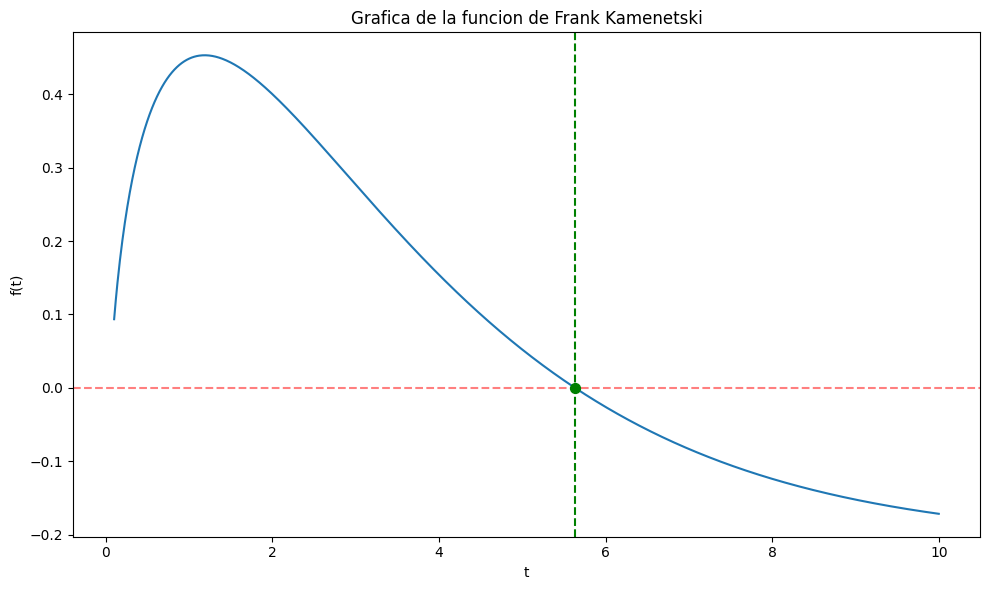

In [ ]:
"""
Con base en el trabajo de Frank Kamenetski realizado en 1995, las temperaturas en el interior
de un material con fuentes de calor incrustadas pueden determinarse si se resuelve la siguiente
ecuación.

(e^-(1/2)t)((cosh)^-1)(e(1/2)t) = sqrt((1/2)Lct)

Dado que Lct = 0.088, encuentre el valor de t
"""

import numpy as np
import matplotlib.pyplot as plt

# Lct dado en el problema
Lct = 0.088

# Igualamos la funcion a 0 para encontrar la raiz
funcion = lambda t : (np.exp((-1/2)*t))*(np.arccosh(np.exp((1/2)*t))) - np.sqrt((1/2)*Lct)

# Observando la grafica desde geogebra podemos ver que la raiz se encuentra entre 5 y 6
a = 5
b = 6

# Calculamos la raiz usando el metodo de biseccion
iteraciones, raiz = Biseccion(funcion, a, b, 1e-6)

print(f"El valor de t es: {raiz} y se encontro en {iteraciones} iteraciones")

t_valores = np.linspace(0.1, 10, 1000)
f_valores = [funcion(t) for t in t_valores]

#---------------------------------------------------------#

# Graficamos la funcion para ver el comportamiento de la funcion y la raiz encontrada
plt.figure(figsize=(10, 6))
plt.plot(t_valores, f_valores, label='f(t)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.title('Grafica de la funcion de Frank Kamenetski')
plt.ylabel('f(t)')
plt.xlabel('t')

#Se marca el punto donde está la raíz
plt.axvline(x=raiz, color='g', linestyle='--', label='Raíz encontrada')
plt.scatter([raiz], [0], color='g', s=50, zorder=5)

plt.tight_layout()
plt.show()